# **Problum statment**
# **Diabetes Prediction**

-- The Dataset is about Diabetis test.

-- This dataset have 768 rows & 9 columns.

-- All attributes are numeric variables.

**Column Heads:**

1. Pregnancies
2. Glucose
3. BloodPressure
4. SkinThickness
5. Insulin
6. BMI
7. DiabetesPedigreeFunction
8. Age
9. Outcome (Have Diabetis or not)

* **TARGET VARIABLE in this Dtaset is 'Outcome'**

**Goals:**

* The primary goal of this dataset is to predict whether a patient has diabetes or not based on diagnostic measurements.

* **Early Detection and Diagnosis:** By using this dataset to build a predictive model, healthcare professionals can potentially identify individuals at risk of diabetes even before they develop noticeable symptoms. Early detection allows for timely intervention and management, which can significantly improve patient outcomes.

* **Personalized Risk Assessment:** The model can help assess an individual's risk of developing diabetes based on their specific characteristics (pregnancies, glucose level, blood pressure, etc.). This personalized risk assessment can empower individuals to make informed lifestyle choices and take preventive measures to reduce their risk.

* **Improving Treatment Strategies:** The insights gained from analyzing this dataset can contribute to the development of more effective treatment strategies for diabetes. By understanding the factors that influence the disease's progression, healthcare providers can tailor treatment plans to individual needs, potentially leading to better blood sugar control and reduced complications.

* **Public Health Planning:** The dataset can be used to study the prevalence and distribution of diabetes within specific populations (e.g., Pima Indian women in this case). This information is valuable for public health planning and resource allocation, allowing for targeted interventions and prevention programs.

* **Research and Development:** The dataset serves as a valuable resource for researchers studying diabetes. It can be used to explore new diagnostic methods, identify potential drug targets, and gain a deeper understanding of the disease's underlying mechanisms.

* Improve the prediction, diagnosis, treatment, and prevention of diabetes. By enabling early detection, personalized risk assessment, and more effective treatment strategies, this dataset can ultimately help reduce the burden of this chronic disease.
---

# Libraries

In [1]:
import pandas as pd
import numpy as np

#Ploating
import matplotlib.pyplot as plt
import seaborn as sns

#Emcoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

# x-y split
from sklearn.model_selection import train_test_split

#Scaling
from sklearn.preprocessing import StandardScaler

# Classification algorithms
from sklearn.linear_model import LogisticRegression,RidgeClassifier,Perceptron,PassiveAggressiveClassifier,SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,VotingClassifier,StackingClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC,LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
import xgboost as xgb
import lightgbm as lgb

#MSE AND MAE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

#
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from tabulate import tabulate
import warnings
from sklearn.metrics import accuracy_score


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Loading Dataset

In [2]:
df=pd.read_csv('/kaggle/input/diabetes-dataset/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# ***Understanding the data***

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* All attributes are numeric variables.

In [4]:
df.shape

(768, 9)

This dataset have 786 rows & 9 columns

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no Null values(Missing values) in the Dataset

In [8]:
df.duplicated().sum()

0

There is no Duplicated rows in the Dataset

In [9]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

All attributes are numeric variables.

# Data Visualization

**Histogram for entire dataset**

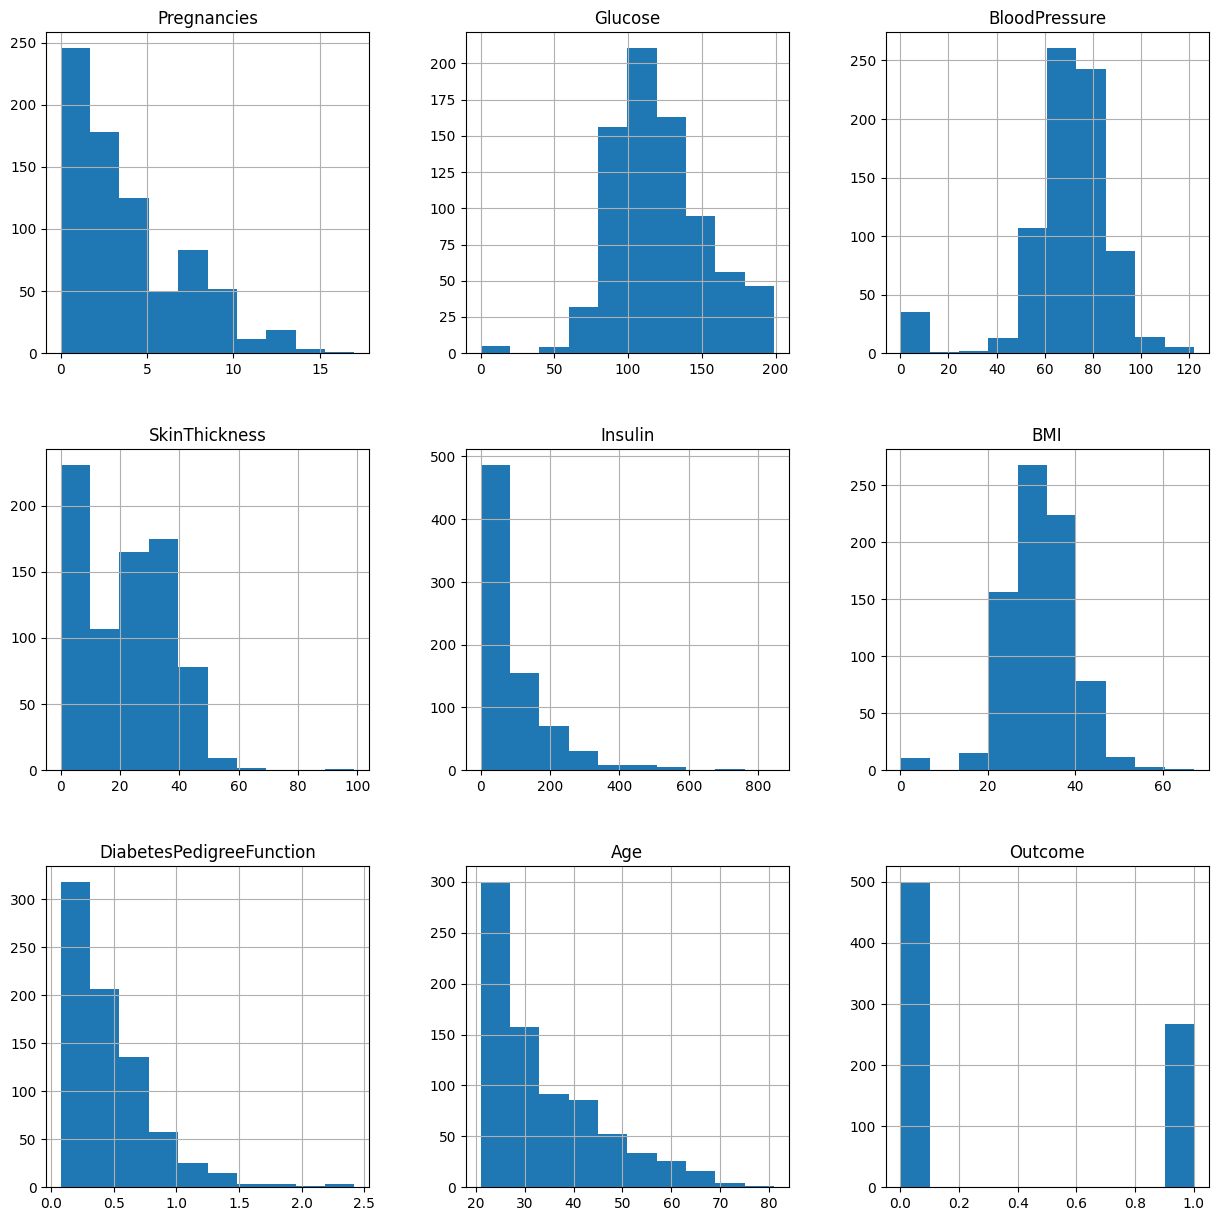

In [10]:
df.hist(figsize=(15,15))
plt.show()

Outcome

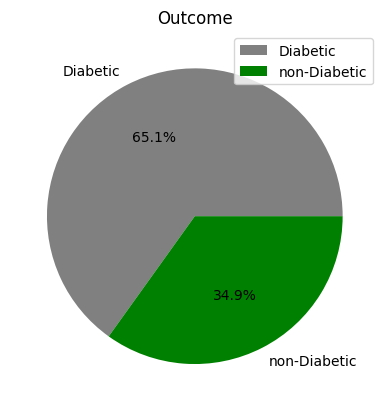

In [11]:
plt.pie(df['Outcome'].value_counts(),autopct='%1.1f%%',labels=['Diabetic','non-Diabetic'],colors=['Grey','g'])
plt.title('Outcome')
plt.legend()
plt.show()

* In this dataset 65.1% of individuals are Diabetic & 34.9% are non Diabetic.

# Outlier detection

<Axes: >

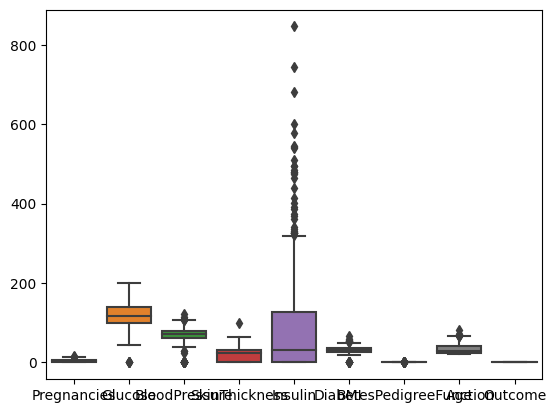

In [12]:
sns.boxplot(df)

In [13]:
df1=df.copy()

In [14]:
def outlier(column):
  Q1=column.quantile(0.25)
  Q3=column.quantile(0.75)
  IQR=Q3-Q1
  Lp=Q1-1.5*IQR
  Up=Q3+1.5*IQR
  return (column<Lp)|(column>Up)

OIQR=(df1.select_dtypes(include='number')).apply(outlier)

In [15]:
print(OIQR.sum())

Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64


In [16]:
df1=df1[~(OIQR.any(axis=1))]

In [17]:
df2=df1.copy()

In [18]:
print((df2.select_dtypes(include='number')).skew())

Pregnancies                 0.829074
Glucose                     0.603106
BloodPressure               0.104619
SkinThickness              -0.070649
Insulin                     1.008737
BMI                         0.290456
DiabetesPedigreeFunction    0.969029
Age                         1.032472
Outcome                     0.808485
dtype: float64


In [19]:
df2['p_Insulin']=np.log1p(df1['Insulin'])
df2['p_Age']=np.log1p(df1['Age'])
df2['p_Pregnancies']=np.log1p(df1['Pregnancies'])
df2['p_Pregnancies']=np.log1p(df1['Pregnancies'])

# Correlation Analysis:

In [20]:
c=df2.corr()
c

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,p_Insulin,p_Age,p_Pregnancies
Pregnancies,1.000000,0.142093,0.210666,-0.094425,-0.114510,0.036958,0.009289,0.567438,0.227987,-0.183598,0.605539,0.937656
Glucose,0.142093,1.000000,0.238754,-0.004609,0.248225,0.192504,0.066530,0.286682,0.492740,0.066469,0.290041,0.128657
BloodPressure,0.210666,0.238754,1.000000,0.037388,-0.041513,0.303301,0.024290,0.354036,0.183298,-0.110181,0.368126,0.147844
SkinThickness,-0.094425,-0.004609,0.037388,1.000000,0.487566,0.390340,0.148486,-0.143376,0.030676,0.543843,-0.129331,-0.122315
Insulin,-0.114510,0.248225,-0.041513,0.487566,1.000000,0.188635,0.213191,-0.089535,0.097746,0.884490,-0.083459,-0.117822
BMI,0.036958,0.192504,0.303301,0.390340,0.188635,1.000000,0.144757,0.063370,0.269371,0.105200,0.092368,-0.014146
DiabetesPedigreeFunction,0.009289,0.066530,0.024290,0.148486,0.213191,0.144757,1.000000,0.030081,0.179072,0.199853,0.039591,-0.005067
Age,0.567438,0.286682,0.354036,-0.143376,-0.089535,0.063370,0.030081,1.000000,0.263344,-0.201916,0.988900,0.518998
Outcome,0.227987,0.492740,0.183298,0.030676,0.097746,0.269371,0.179072,0.263344,1.000000,-0.022153,0.292163,0.200868
p_Insulin,-0.183598,0.066469,-0.110181,0.543843,0.884490,0.105200,0.199853,-0.201916,-0.022153,1.000000,-0.198051,-0.172573


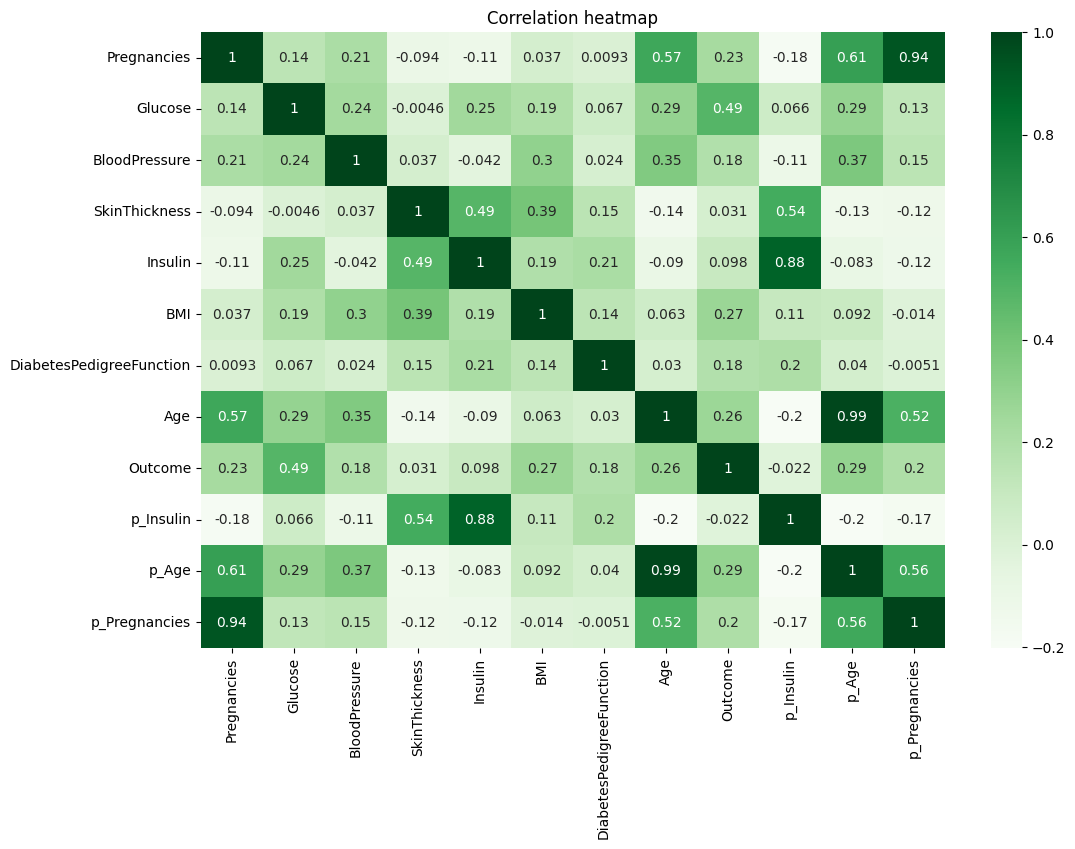

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(c,annot=True,cmap='Greens')
plt.title('Correlation heatmap')
plt.show()

In [22]:
s=df2.corr()['Outcome']
s.sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492740
p_Age                       0.292163
BMI                         0.269371
Age                         0.263344
Pregnancies                 0.227987
p_Pregnancies               0.200868
BloodPressure               0.183298
DiabetesPedigreeFunction    0.179072
Insulin                     0.097746
SkinThickness               0.030676
p_Insulin                  -0.022153
Name: Outcome, dtype: float64

# Feature Selection

In [23]:
df2=df2.drop(['p_Insulin','p_Pregnancies','Age'],axis=1)

In [24]:
x=df2.drop('Outcome',axis=1)
y=df2['Outcome']

# Data Splitting

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

# Initial Modeling:

In [26]:
# List of Classification models to apply
models = {
    'Logistic Regression': LogisticRegression(),
    'LDA': LinearDiscriminantAnalysis(),
    'Ridge Classifier': RidgeClassifier(),
    'Perceptron': Perceptron(),
    'Passive Aggressive': PassiveAggressiveClassifier(),
    'SGD Classifier': SGDClassifier(),
    'SVC': SVC(probability=True),
    'Linear SVC': LinearSVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'LightGBM': lgb.LGBMClassifier(),
    # 'CatBoost': CatBoostClassifier(verbose=0),
    'Gaussian NB': GaussianNB(),
    'Multinomial NB': MultinomialNB(),
    'Bernoulli NB': BernoulliNB(),
    'MLP': MLPClassifier(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Gaussian Process Classifier': GaussianProcessClassifier()
}

skf = StratifiedKFold(n_splits=5)

In [27]:
result={}
for name,model in models.items():
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)

  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred,average='weighted')
  recall=recall_score(y_test,y_pred,average='weighted')
  f1=f1_score(y_test,y_pred,average='weighted')
  # roc_auc=roc_auc_score(y_test,y_pred,average='weighted',multi_class='ovr')
  CM=confusion_matrix(y_test,y_pred)
  report=classification_report(y_test,y_pred,output_dict=True)

  metrics={
      # 'Model':name,
      'Accuracy':accuracy,
      'Precision':precision,
      'Recall':recall,
      'F1 Score':f1,
      # 'ROC AUC':roc_auc,
      'Confusion Matrix':CM,
      'Classification Report':report
  }
  result[name] = metrics

results_df = pd.DataFrame(result).T
results_df

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

[LightGBM] [Info] Number of positive: 166, number of negative: 345
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 577
[LightGBM] [Info] Number of data points in the train set: 511, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.324853 -> initscore=-0.731557
[LightGBM] [Info] Start training from score -0.731557
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

,Accuracy,Precision,Recall,F1 Score,Confusion Matrix,Classification Report
Logistic Regression,0.796875,0.787634,0.796875,0.790187,"[[84, 10], [16, 18]]","{'0': {'precision': 0.84, 'recall': 0.89361702..."
LDA,0.789062,0.780559,0.789062,0.783424,"[[83, 11], [16, 18]]","{'0': {'precision': 0.8383838383838383, 'recal..."
Ridge Classifier,0.804688,0.795122,0.804688,0.796987,"[[85, 9], [16, 18]]","{'0': {'precision': 0.8415841584158416, 'recal..."
Perceptron,0.703125,0.697591,0.703125,0.700189,"[[76, 18], [20, 14]]","{'0': {'precision': 0.7916666666666666, 'recal..."
Passive Aggressive,0.734375,0.539307,0.734375,0.621903,"[[94, 0], [34, 0]]","{'0': {'precision': 0.734375, 'recall': 1.0, '..."
SGD Classifier,0.320312,0.809013,0.320312,0.218327,"[[7, 87], [0, 34]]","{'0': {'precision': 1.0, 'recall': 0.074468085..."
SVC,0.8125,0.807449,0.8125,0.791007,"[[90, 4], [20, 14]]","{'0': {'precision': 0.8181818181818182, 'recal..."
Linear SVC,0.515625,0.698307,0.515625,0.534895,"[[40, 54], [8, 26]]","{'0': {'precision': 0.8333333333333334, 'recal..."
KNN,0.742188,0.739798,0.742188,0.740946,"[[78, 16], [17, 17]]","{'0': {'precision': 0.8210526315789474, 'recal..."
Decision Tree,0.765625,0.785905,0.765625,0.772752,"[[75, 19], [11, 23]]","{'0': {'precision': 0.872093023255814, 'recall..."


Gradient Boosting | Ridge Classifier | Linear SVC

# Voating

Hard

In [28]:
voting_clf_hard = VotingClassifier(estimators=[
    ('Gradient Boosting',GradientBoostingClassifier()),
    ('Ridge Classifier',RidgeClassifier()),
    ('Linear SVC',LinearSVC())
], voting='hard')

In [29]:
voting_clf_hard.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


VotingClassifier(estimators=[('Gradient Boosting',
                              GradientBoostingClassifier()),
                             ('Ridge Classifier', RidgeClassifier()),
                             ('Linear SVC', LinearSVC())])

In [30]:
y_pred_hard = voting_clf_hard.predict(x_test)

In [31]:
accuracy_hard = accuracy_score(y_test, y_pred_hard)
print(f'Hard Voting Classifier Accuracy: {accuracy_hard:.4f}')

Hard Voting Classifier Accuracy: 0.8281


---

#Documentation and Reporting


## Diabetes Prediction Project Report.

**1. Problem Statement:**
- This dataset provides a comprehensive collection of Diabetes test.

- The primary objective is to build a model that accurately predicts Is the individual Diabetic or not based on its features.

**2. Libraries:**
- import required Libraries

**3. Data Understanding:**
- The dataset has 768 rows & 9 columns.
- Features include: Pregnancie , Glucose , BloodPressure , SkinThickness , Insulin , BMI , DiabetesPedigreeFunction , Age & Outcome
- Target Variable: Outcome.

**4. Data Cleaning:**
- 82 duplicated rows where found.
- duplicated rows removed.
- Missing values were found in 'title' , 'genres' , 'releaseYear' , 'imdbId' , 'imdbAverageRating' and 'imdbNumVotes' columns.
- Missing values were handled by droping rows where have null values.
- Droped the column availableCountries.
- Droped the column imdbId.
- Changed dtype of releaseYear and imdbNumVotes form float into int.

**5. Encoding:**
- Encode the column type with replace method.
- Encod columns title and genres with label encoding.

**6. Data Visualization:**
- Pairplot created for entire dataset to understand their relation.
- Histograms were created for imdbAverageRating, imdbNumVotes and releaseYear to understand their distributions.
- Pie chart created for type to understand their percent for each value.
- Skewness of imdbNumVotes handled using log1p method.

**7. Outlier detection:**
- Outliers were identified and addressed in the 'releaseYear' columns using a box plot method.
- And removed in the 'releaseYear'.

**8. Correlation Analysis:**
- Correlation Analysis: a heatmap of the correlation matrix revealed the relationships between the variables.

**9. X-Y spliting**
- Target column stored in y variable.
- Other features stored in x variable.
- split x_train, x_test, y_train and y_test.

**10. Data Scaling:**
- x_train and x_test were scaled using StandardScaler.

**11. Initial Modeling:**
- Multiple regression models were tested:-
* Linear Regression.
* Ridge Regression.
* Lasso Regression.
* ElasticNet Regression.
* Decision Tree Regression.
* Random Forest Regression.
* Gradient Boosting Regression.
* Support Vector Regression.
* K-Nearest Neighbors Regression.
* Neural Network Regression.

-- Select 3 best models(Gradient Boosting , Ridge Classifier , Linear SVC)

--Take Hard Voting Classifier Accuracy as the final model.

-- Get Accuracy approximate 0.8047

**THANK YOU**